In [105]:
import pandas as pd
directory_toTrain = "trainingFiles"
df = pd.read_csv(directory_toTrain+'/'+'7.csv')

In [111]:
df.head()

value  value-30  value-29  value-28  value-27  value-26  value-25  \
30  0.029468  0.000000  0.033187  0.000000  0.025619  0.000000  0.026722   
31  0.026140  0.033187  0.000000  0.025619  0.000000  0.026722  0.000000   
32  0.028508  0.000000  0.025619  0.000000  0.026722  0.000000  0.000000   
33  0.000000  0.025619  0.000000  0.026722  0.000000  0.000000  0.028346   
34  0.029272  0.000000  0.026722  0.000000  0.000000  0.028346  0.000000   

    value-24  value-23  value-22  ...   value-7   value-6   value-5   value-4  \
30  0.000000  0.000000  0.028346  ...  0.000000  0.028336  0.000000  0.028205   
31  0.000000  0.028346  0.000000  ...  0.028336  0.000000  0.028205  0.027499   
32  0.028346  0.000000  0.000000  ...  0.000000  0.028205  0.027499  0.000000   
33  0.000000  0.000000  0.031770  ...  0.028205  0.027499  0.000000  0.028100   
34  0.000000  0.031770  0.031190  ...  0.027499  0.000000  0.028100  0.029468   

     value-3   value-2   value-1  Prediction+1  Prediction+2  Prediction+3  
30  0.027499  0.000000  0.028100      0.026140      0.028508      0.000000  
31  0.000000  0.028100  0.029468      0.028508      0.000000      0.029272  
32  0.028100  0.029468  0.026140      0.000000      0.029272      0.000000  
33  0.029468  0.026140  0.028508      0.029272      0.000000      0.027059  
34  0.026140  0.028508  0.000000      0.000000      0.027059      0.025764  

[5 rows x 34 columns]

### Creating the master training file

In [107]:
look_back = 30 #m
forward = 3

In [109]:
df = trainingDFcreation(df)

In [108]:
def trainingDFcreation(df):
    df=df.drop(['latitude','longitude'],axis=1)
    for i in range(0,look_back):
        index = 'value-'+ str(look_back-i)
        df[index]=df[['value']].shift(look_back-i)
    df['Prediction+1']=df[['value']].shift(-1)
    df['Prediction+2']=df[['value']].shift(-2)
    df['Prediction+3']=df[['value']].shift(-3)
    df=df[look_back:]
    df=df[0:len(df)-forward-1]
    df=df.drop(['date'],axis=1)
    return df

In [113]:
directory_toTrain = "trainingFilesHighRes"
directoryOfExperimentalValues = "experimentalCSV"

#### converting data of each pixel to trainable format
please note here each pixel will have it's own trainable file

In [118]:
import os
for filename in os.listdir(directory_toTrain):
    inputFileLoc = directory_toTrain+"/"+filename
    outputFileLoc = directoryOfExperimentalValues+"/" +filename[0:10]
    df = pd.read_csv(inputFileLoc)
    df = trainingDFcreation(df)
    df.to_csv(outputFileLoc,index = False)
    

#### collating values of each pixel and making a master training file

In [214]:
df = pd.read_csv(directoryOfExperimentalValues+"/1.csv")

In [215]:
df.head()

value  value-30  value-29  value-28  value-27  value-26  value-25  \
0  0.029203       0.0       0.0       0.0  0.000000  0.000000  0.000000   
1  0.000000       0.0       0.0       0.0  0.000000  0.000000  0.000000   
2  0.028824       0.0       0.0       0.0  0.000000  0.000000  0.032542   
3  0.000000       0.0       0.0       0.0  0.000000  0.032542  0.032944   
4  0.030267       0.0       0.0       0.0  0.032542  0.032944  0.000000   

   value-24  value-23  value-22  ...   value-7   value-6   value-5   value-4  \
0  0.000000  0.032542  0.032944  ...  0.000000  0.034754  0.000000  0.031146   
1  0.032542  0.032944  0.000000  ...  0.034754  0.000000  0.031146  0.023080   
2  0.032944  0.000000  0.000000  ...  0.000000  0.031146  0.023080  0.000000   
3  0.000000  0.000000  0.024613  ...  0.031146  0.023080  0.000000  0.000000   
4  0.000000  0.024613  0.000000  ...  0.023080  0.000000  0.000000  0.029203   

    value-3   value-2   value-1  Prediction+1  Prediction+2  Prediction+3  
0  0.023080  0.000000  0.000000      0.000000      0.028824      0.000000  
1  0.000000  0.000000  0.029203      0.028824      0.000000      0.030267  
2  0.000000  0.029203  0.000000      0.000000      0.030267      0.026625  
3  0.029203  0.000000  0.028824      0.030267      0.026625      0.000000  
4  0.000000  0.028824  0.000000      0.026625      0.000000      0.028725  

[5 rows x 34 columns]

In [216]:
master_df = df[0:0]

In [217]:
master_df

Empty DataFrame
Columns: [value, value-30, value-29, value-28, value-27, value-26, value-25, value-24, value-23, value-22, value-21, value-20, value-19, value-18, value-17, value-16, value-15, value-14, value-13, value-12, value-11, value-10, value-9, value-8, value-7, value-6, value-5, value-4, value-3, value-2, value-1, Prediction+1, Prediction+2, Prediction+3]
Index: []

[0 rows x 34 columns]

In [218]:
for filename in os.listdir(directoryOfExperimentalValues):
    inputFile = directoryOfExperimentalValues+"/"+filename
    df = pd.read_csv(inputFile)
    master_df = master_df.append(df,ignore_index = True)

In [219]:
master_df.shape

(4512, 34)

In [190]:
master_df.head()

value  value-30  value-29  value-28  value-27  value-26  value-25  \
0  0.029203       0.0       0.0       0.0  0.000000  0.000000  0.000000   
1  0.000000       0.0       0.0       0.0  0.000000  0.000000  0.000000   
2  0.028824       0.0       0.0       0.0  0.000000  0.000000  0.030557   
3  0.000000       0.0       0.0       0.0  0.000000  0.030557  0.031515   
4  0.019554       0.0       0.0       0.0  0.030557  0.031515  0.000000   

   value-24  value-23  value-22  ...   value-7   value-6   value-5   value-4  \
0  0.000000  0.030557  0.031515  ...  0.000000  0.034754  0.000000  0.031146   
1  0.030557  0.031515  0.000000  ...  0.034754  0.000000  0.031146  0.023080   
2  0.031515  0.000000  0.000000  ...  0.000000  0.031146  0.023080  0.000000   
3  0.000000  0.000000  0.024613  ...  0.031146  0.023080  0.000000  0.000000   
4  0.000000  0.024613  0.000000  ...  0.023080  0.000000  0.000000  0.029203   

    value-3   value-2   value-1  Prediction+1  Prediction+2  Prediction+3  
0  0.023080  0.000000  0.000000      0.000000      0.028824      0.000000  
1  0.000000  0.000000  0.029203      0.028824      0.000000      0.019554  
2  0.000000  0.029203  0.000000      0.000000      0.019554      0.023645  
3  0.029203  0.000000  0.028824      0.019554      0.023645      0.000000  
4  0.000000  0.028824  0.000000      0.023645      0.000000      0.028725  

[5 rows x 34 columns]

In [232]:
master_df.to_csv('experimentalCSV.csv',index = False)

#### creating another experimntalCSV without zeroes

In [220]:
df = master_df

In [199]:
df = master_df[master_df['value'] != 0]

In [221]:
df = df[df['Prediction+1'] != 0]
df = df[df['Prediction+2'] != 0]
df = df[df['Prediction+3'] != 0]

In [222]:
df.head()

value  value-30  value-29  value-28  value-27  value-26  value-25  \
6   0.000000  0.000000  0.030557  0.031515  0.000000  0.000000  0.024613   
7   0.028725  0.030557  0.031515  0.000000  0.000000  0.024613  0.000000   
14  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
50  0.000000  0.028580  0.000000  0.000000  0.032215  0.000000  0.024670   
51  0.029689  0.000000  0.000000  0.032215  0.000000  0.024670  0.000000   

    value-24  value-23  value-22  ...   value-7   value-6   value-5   value-4  \
6   0.000000  0.000000       0.0  ...  0.000000  0.029203  0.000000  0.028824   
7   0.000000  0.000000       0.0  ...  0.029203  0.000000  0.028824  0.000000   
14  0.000000  0.028167       0.0  ...  0.028725  0.025169  0.024945  0.023891   
50  0.000000  0.021084       0.0  ...  0.000000  0.000000  0.028350  0.000000   
51  0.021084  0.000000       0.0  ...  0.000000  0.028350  0.000000  0.028597   

     value-3   value-2   value-1  Prediction+1  Prediction+2  Prediction+3  
6   0.000000  0.019554  0.023645      0.028725      0.025169      0.024945  
7   0.019554  0.023645  0.000000      0.025169      0.024945      0.023891  
14  0.000000  0.000000  0.000000      0.032808      0.028174      0.027587  
50  0.028597  0.000000  0.000000      0.029689      0.028877      0.026926  
51  0.000000  0.000000  0.000000      0.028877      0.026926      0.030711  

[5 rows x 34 columns]

In [223]:
len(df)

955

In [234]:
df.to_csv('experimentalCSVwithoutZero.csv',index = False)

#### taking file from the experimentalCSV and feeding to model

In [157]:
#with zeroes
df = pd.read_csv('experimentalCSV.csv')

In [235]:
#without zeroes
df = pd.read_csv('experimentalCSVwithoutZero.csv')

In [203]:
len(df)-test_days

557

In [159]:
test_days = 10 #n

In [224]:
df_train =df[:len(df)-test_days]
df_test = df[len(df)-test_days:]

In [31]:
import numpy as np

In [40]:
def processData(df):
    X = np.array(df.drop(['Prediction+1','Prediction+2','Prediction+3'],axis=1))
    y1 = np.array(df['Prediction+1'])
    y2 = np.array(df['Prediction+2'])
    y3 = np.array(df['Prediction+3'])
    return X,y1,y2,y3

In [225]:
df[['Prediction+1','Prediction+2','Prediction+3']].head()

Prediction+1  Prediction+2  Prediction+3
6       0.028725      0.025169      0.024945
7       0.025169      0.024945      0.023891
14      0.032808      0.028174      0.027587
50      0.029689      0.028877      0.026926
51      0.028877      0.026926      0.030711

In [226]:
X,y1,y2,y3 = processData(df_train)
X_test, y1_test,y2_test,y3_test = processData(df_test)

#### Normalizing X using Min-Max scaler

In [209]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()

In [167]:
X

array([[0.02920289, 0.        , 0.        , ..., 0.02307961, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.02920289],
       [0.0288241 , 0.        , 0.        , ..., 0.        , 0.02920289,
        0.        ],
       ...,
       [0.        , 0.02968866, 0.03090579, ..., 0.        , 0.03014006,
        0.        ],
       [0.03000687, 0.03090579, 0.02732605, ..., 0.03014006, 0.        ,
        0.        ],
       [0.04890344, 0.02732605, 0.03037315, ..., 0.        , 0.        ,
        0.03000687]])

In [227]:
X = scl.fit_transform(X)

### Developing the models with SVM regressor

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt

In [228]:
X_train, X_validate, y1_train, y1_validate = train_test_split(X,y1,test_size = 0.2)
X_train, X_validate, y2_train, y2_validate = train_test_split(X,y2,test_size = 0.2)
X_train, X_validate, y3_train, y3_validate = train_test_split(X,y3,test_size = 0.2)

#### rbf kernel

In [229]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
model1 = svr_rbf.fit(X_train,y1_train)
model2 = svr_rbf.fit(X_train,y2_train)
model3 = svr_rbf.fit(X_train,y3_train)

#### linear kernel

In [180]:
svr_rbf = SVR()
model1 = svr_rbf.fit(X_train,y1_train)
model2 = svr_rbf.fit(X_train,y2_train)
model3 = svr_rbf.fit(X_train,y3_train)

#### gausian

In [183]:
svr_rbf = SVR(kernel='linear')
model1 = svr_rbf.fit(X_train,y1_train)
model2 = svr_rbf.fit(X_train,y2_train)
model3 = svr_rbf.fit(X_train,y3_train)

In [236]:
model3

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [181]:
predicted1 = model1.predict(X_test)
predicted2 = model2.predict(X_test)
predicted3 = model3.predict(X_test)

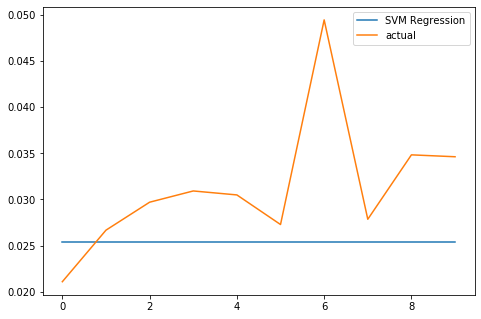

In [230]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(predicted1,label = 'SVM Regression')
ax.plot(y1_test,label = 'actual')
ax.legend()

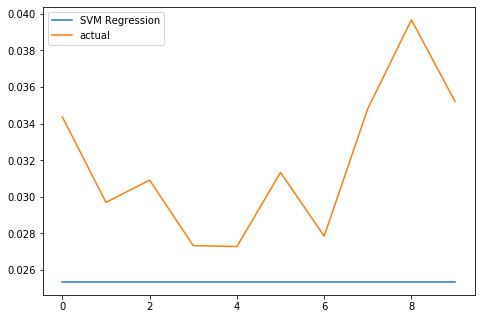

In [237]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(predicted2,label = 'SVM Regression')
ax.plot(y2_test,label = 'actual')
ax.legend()

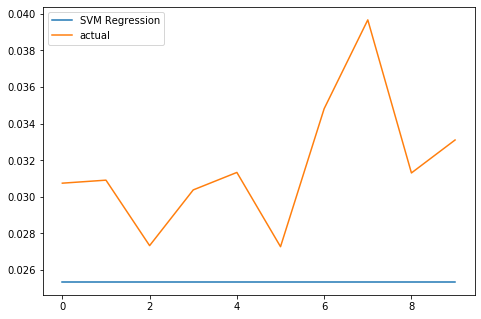

In [238]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(predicted3,label = 'SVM Regression')
ax.plot(y3_test,label = 'actual')
ax.legend()

### saving the models as using pickel

In [231]:

#saving the model
f = open('models/model1.pickle', 'wb')
pickle.dump(model1, f)
f.close()

#saving the model
f = open('models/model2.pickle', 'wb')
pickle.dump(model2, f)
f.close()


#saving the model
f = open('models/model3.pickle', 'wb')
pickle.dump(model3, f)
f.close()